In [1]:
from electra_package.modules_clustering import *
from electra_package.modules_preprocess import *
from electra_package.modules_utils import *
from electra_package.modules_main2 import *
from electra_package.modules_plots import *
from electra_package.modules_fits import *
from sklearn.neighbors import NearestNeighbors
from scipy.stats import linregress

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:

# def initialize_centroids2(points, n_clusters, coord1, coord2):
#     """
#     Initialize centroids for clustering based on the minimum, maximum, and optionally mean of the coordinates.

#     Parameters:
#     points (numpy.ndarray): The coordinates of the points.
#     n_clusters (int): The number of clusters.
#     coord1, coord2 (int): The coordinate axes to consider for initialization.

#     Returns:
#     numpy.ndarray: The initialized centroids.
#     """
#     logger.trace(f"Initializing for {n_clusters} clusters")
#     centroids = np.zeros((n_clusters, 2))
    
#     centroids[0] = [np.min(points[coord1, :]), np.min(points[coord2, :])]
#     centroids[1] = [np.max(points[coord1, :]), np.max(points[coord2, :])]
    
#     if n_clusters > 2:
#         centroids[2] = [np.mean(points[coord1, :]), np.mean(points[coord2, :])]
    
#     return centroids

# def assign_clusters2(points, centroids, coord1, coord2):
#     """
#     Assign each point to the nearest centroid based on the specified coordinates.

#     Parameters:
#     points (numpy.ndarray): The coordinates of the points.
#     centroids (numpy.ndarray): The centroids.
#     coord1, coord2 (int): The coordinate axes to consider for distance calculation.

#     Returns:
#     numpy.ndarray: The index of the nearest centroid for each point.
#     """
#     points_2d = points[[coord1, coord2], :].T
#     distances = np.linalg.norm(points_2d[:, None, :] - centroids[None, :, :], axis=2)
#     return np.argmin(distances, axis=1)

# def update_centroids(points, labels, n_clusters, coord1, coord2):
#     """
#     Update the centroids based on the mean of the points assigned to each cluster.

#     Parameters:
#     points (numpy.ndarray): The coordinates of the points.
#     labels (numpy.ndarray): The cluster labels for each point.
#     n_clusters (int): The number of clusters.
#     coord1, coord2 (int): The coordinate axes to consider for updating centroids.

#     Returns:
#     numpy.ndarray: The updated centroids.
#     """
#     new_centroids = np.zeros((n_clusters, 2))
#     for i in range(n_clusters):
#         cluster_points = points[:, labels == i]
#         if cluster_points.size > 0:
#             new_centroids[i] = [np.mean(cluster_points[coord1, :]), np.mean(cluster_points[coord2, :])]
#     return new_centroids

# def kmeans_clustering2(points, n_clusters, max_iterations, coord1, coord2):
#     """
#     Perform KMeans clustering on the specified coordinates of the points.

#     Parameters:
#     points (numpy.ndarray): The coordinates of the points.
#     n_clusters (int): The number of clusters.
#     max_iterations (int): The maximum number of iterations for the KMeans algorithm.
#     coord1, coord2 (int): The coordinate axes to consider for clustering.

#     Returns:
#     tuple: Cluster labels and centroids.
#     """
#     logger.debug(f"Starting KMeans clustering for coords: {coord1} and {coord2}")
#     centroids = initialize_centroids(points, n_clusters, coord1, coord2)
#     for iteration in range(max_iterations):
#         labels = assign_clusters(points, centroids, coord1, coord2)
#         new_centroids = update_centroids(points, labels, n_clusters, coord1, coord2)
#         if np.allclose(new_centroids, centroids):
#             logger.debug(f"Convergence reached at iteration {iteration}")
#             break
#         centroids = new_centroids
#     return labels, centroids

# def plot_clusters2(points, labels, centroids, coord1, coord2):
#     """
#     Plot the clusters and centroids.

#     Parameters:
#     points (numpy.ndarray): The coordinates of the points.
#     labels (numpy.ndarray): The cluster labels for each point.
#     centroids (numpy.ndarray): The centroids.
#     coord1, coord2 (int): The coordinate axes used for clustering.
#     """
#     plt.scatter(points[coord1, :], points[coord2, :], c=labels, cmap='viridis', s=1)
#     plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='x', label='Centroids')
#     plt.title(f'Clusters along {["X", "Y", "Z"][coord1]} and {["X", "Y", "Z"][coord2]} axes')
#     plt.xlabel(f'{["X", "Y", "Z"][coord1]} Coordinate')
#     plt.ylabel(f'{["X", "Y", "Z"][coord2]} Coordinate')
#     plt.legend()
#     plt.show()


In [3]:
# def initialize_centroids(points, n_clusters, coord):
#     """
#     Initialize centroids for clustering based on the minimum, maximum, and optionally mean of the x-coordinates.

#     Parameters:
#     points (numpy.ndarray): The x, y, and z coordinates of the points.
#     n_clusters (int): The number of clusters.

#     Returns:
#     numpy.ndarray: The initialized centroids.
#     """
#     logger.trace(f"Initializing for {n_clusters} clusters")
#     centroids = np.zeros(n_clusters)
    
#     centroids[0] = np.min(points[coord, :])
#     centroids[1] = np.max(points[coord, :])
    
#     if n_clusters > 2:
#         step = (centroids[1] - centroids[0]) / (n_clusters - 1)
#         for i in range(2, n_clusters):
#             centroids[i] = centroids[0] + step * (i - 1)
    
#     return centroids

# def assign_clusters(points, centroids, coord):
#     """
#     Assign each point to the nearest centroid based on the specified coordinate.

#     Parameters:
#     points (numpy.ndarray): The x, y, and z coordinates of the points.
#     centroids (numpy.ndarray): The centroids.
#     coord (int): The coordinate axis to use for distance calculation.

#     Returns:
#     numpy.ndarray: The index of the nearest centroid for each point.
#     """
#     distances = np.abs(points[coord, :, None] - centroids)
#     return np.argmin(distances, axis=1)

# def update_centroids(points, labels, n_clusters, coord):
#     """
#     Update the centroids based on the mean of the points assigned to each cluster.

#     Parameters:
#     points (numpy.ndarray): The x, y, and z coordinates of the points.
#     labels (numpy.ndarray): The cluster labels for each point.
#     n_clusters (int): The number of clusters.
#     coord (int): The coordinate axis to use for updating centroids.

#     Returns:
#     numpy.ndarray: The updated centroids.
#     """
#     new_centroids = np.zeros(n_clusters)
#     for i in range(n_clusters):
#         cluster_points = points[coord, labels == i]
#         if cluster_points.size > 0:
#             new_centroids[i] = np.mean(cluster_points)
#     return new_centroids

# def kmeans_clustering(points, n_clusters, max_iterations, coord):
#     """
#     Perform KMeans clustering on the specified coordinate of the points.

#     Parameters:
#     points (numpy.ndarray): The x, y, and z coordinates of the points.
#     n_clusters (int): The number of clusters.
#     max_iterations (int): The maximum number of iterations for the KMeans algorithm.
#     coord (int): The coordinate axis to use for clustering.

#     Returns:
#     tuple: Cluster labels and centroids.
#     """
#     logger.debug(f"Starting KMeans clustering for coord: {coord}")
#     centroids = initialize_centroids(points, n_clusters, coord)
#     for iteration in range(max_iterations):
#         labels = assign_clusters(points, centroids, coord)
#         new_centroids = update_centroids(points, labels, n_clusters, coord)
#         if np.allclose(new_centroids, centroids):
#             logger.trace(f"Convergence reached at iteration {iteration}")
#             break
#         centroids = new_centroids
#     return labels, centroids

In [4]:
def plot_2d(rotated_conds, rotated_extremos, rotated_apoyos):

    plt.figure(figsize=(12,6))

    plt.subplot(121)
    plt.scatter(rotated_conds[1], rotated_conds[2], s = 1, label = "Original Conductors")
    plt.scatter(rotated_apoyos[1], rotated_apoyos[2], s = 1, label = "Cropped Conductors")

    plt.scatter(rotated_extremos[1], rotated_extremos[2], color='black')
    plt.title("YZ")

    plt.subplot(122)
    plt.scatter(rotated_conds[0], rotated_conds[1], s = 1, label = "Original Conductors")
    plt.scatter(rotated_apoyos[0], rotated_apoyos[1], s = 1, label = "Cropped Conductors")

    plt.scatter(rotated_extremos[0], rotated_extremos[1], color='black')
    plt.title("XY")

    plt.show()
    
def plot_clusters(points, labels, centroids, coord):
    """
    Plot the clusters and centroids.

    Parameters:
    points (numpy.ndarray): The x, y, and z coordinates of the points.
    labels (numpy.ndarray): The cluster labels for each point.
    centroids (numpy.ndarray): The centroids.
    coord (int): The coordinate axis used for clustering.
    """
    if coord == 0:
        coord1, coord2 = 1, 2
    elif coord == 1:
        coord1, coord2 = 0, 2
    else:
        coord1, coord2 = 0, 1

    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.scatter(points[coord, :], points[coord1, :], c=labels, cmap='viridis', s=1)
    plt.vlines(centroids, ymin=np.min(points[coord1, :]), ymax=np.max(points[coord1, :]), color='red', label='Centroids')
    plt.subplot(1,2,2)
    plt.scatter(points[coord, :], points[coord2, :], c=labels, cmap='viridis', s=1)
    plt.vlines(centroids, ymin=np.min(points[coord2, :]), ymax=np.max(points[coord2, :]), color='red', label='Centroids')
    plt.title(f'Clusters along {["X", "Y", "Z"][coord]}-axis vs {["X", "Y", "Z"][coord1]}-axis')
    plt.xlabel(f'{["X", "Y", "Z"][coord]} Coordinate')
    plt.ylabel(f'{["X", "Y", "Z"][coord1]} Coordinate')
    plt.legend()
    plt.show()

In [5]:
def random_sampling(point_cloud, num_points):
    logger.debug(f"random sampling for: {num_points}")
    if point_cloud.shape[1] <= num_points:
        return point_cloud
    indices = np.random.choice(int(point_cloud.shape[1]), int(num_points), replace=False)
    return point_cloud[:, indices]

def voxel_grid_downsampling(point_cloud, voxel_size):
    """
    Perform voxel grid downsampling on 3D points.

    Args:
        point_cloud (numpy.ndarray): Input points of shape (3, N).
        voxel_size (float): Size of the voxel.

    Returns:
        numpy.ndarray: Downsampled points of shape (3, M).
    """
    
    logger.debug(f"voxel grid downsampling for: {voxel_size}")
    # Calculate the minimum and maximum coordinates for each dimension
    xyz_min = np.min(point_cloud, axis=1, keepdims=True)
    xyz_max = np.max(point_cloud, axis=1, keepdims=True)
    
    # Create a grid by flooring the points divided by voxel size
    grid = np.floor((point_cloud - xyz_min) / voxel_size).astype(int)
    
    # Find unique voxel indices and their first occurrences
    unique_voxels, indices = np.unique(grid, axis=1, return_index=True)
    
    # Select the downsampled points using the indices
    downsampled_point_cloud = point_cloud[:, indices]
    
    return downsampled_point_cloud
    
def voxel_grid_downsampling_with_centroids(point_cloud, voxel_size):
    """
    Perform voxel grid downsampling on 3D points, using the centroid of points within each voxel.

    Args:
        point_cloud (numpy.ndarray): Input points of shape (3, N).
        voxel_size (float): Size of the voxel.

    Returns:
        numpy.ndarray: Downsampled points of shape (3, M).
    """
    logger.trace(f"voxel grid downsampling for: {voxel_size}")
    xyz_min = np.min(point_cloud, axis=1, keepdims=True)
    grid = np.floor((point_cloud - xyz_min) / voxel_size).astype(int)
    
    voxel_dict = {}
    for i, g in enumerate(grid.T):
        key = tuple(g)
        if key not in voxel_dict:
            voxel_dict[key] = []
        voxel_dict[key].append(point_cloud[:, i])
    
    downsampled_points = []
    for voxel_points in voxel_dict.values():
        centroid = np.mean(voxel_points, axis=0)
        downsampled_points.append(centroid)
    
    downsampled_points = np.array(downsampled_points).T
    return downsampled_points

In [6]:
def down_sample_lidar(apoyo_values, cond_values):
    
    apoyo_values = voxel_grid_downsampling_with_centroids(apoyo_values, 0.25)
    cond_values = voxel_grid_downsampling_with_centroids(cond_values, 0.25)
    
    return apoyo_values, cond_values

def analyze_conductor_configuration(X_scaled):
    
    logger.info(f"Analyzing conductor configuration 2")
    
    a1,b1 = np.histogram(X_scaled[0,:]/np.max(X_scaled[0,:]), bins=5)
    a2,b2 = np.histogram(X_scaled[1,:]/np.max(X_scaled[1,:]), bins=5)
    a3,b3 = np.histogram(X_scaled[2,:]/np.max(X_scaled[2,:]), bins=5)
    
    normalized_a1 = a1/np.max(a1)
    normalized_a2 = a2/np.max(a2)
    normalized_a3 = a3/np.max(a3)
    
    vars = [np.std(normalized_a1), np.std(normalized_a2), np.std(normalized_a3)]
    
    max_var = np.argmax(vars)
    min_var = np.argmin(vars)
    
    cond1 = np.abs(np.max(normalized_a1)-np.min(normalized_a1)) > np.abs(np.max(normalized_a2)-np.min(normalized_a2))
    cond2 = np.abs(np.max(normalized_a3)-np.min(normalized_a3)) > np.abs(np.max(normalized_a2)-np.min(normalized_a2))
    
    cond3 = (max_var == 0)
    cond4 = (max_var == 2)
    
    # cond5 = (min_var/max_var < 0.5)
    
    logger.debug(f"Conductor variances {np.std(normalized_a1)} ,{np.std(normalized_a2)}, {np.std(normalized_a3)}")
    logger.debug(f"Histogram and variance conditions (x,z) {cond1,cond3}, {cond2,cond4}")
    logger.trace(f"Horizontal condition {np.abs(np.max(normalized_a1)-np.min(normalized_a1))} , {np.abs(np.max(normalized_a2)-np.min(normalized_a2))}, {np.abs(np.max(normalized_a3)-np.min(normalized_a3))}")
    
    logger.success(f"Max var coordinate for conductors {max_var}")

    if cond1 and cond3:

            logger.success("Distribución horizontal")
            return 0, max_var
            
    else:
            logger.warning("Other geometry")
            
            # plt.figure(figsize=(12,8))
            # plt.hist(X_scaled[0,:], bins = 5, label = "x", alpha = 0.5)
            # plt.hist(X_scaled[1,:], bins = 5, label = "y", alpha = 0.5)
            # plt.hist(X_scaled[2,:], bins = 5, label = "z", alpha = 0.5)
            # plt.title("Coordinate distribution")
            # plt.legend()
            # plt.show()
                
            
            if cond2 and cond4:
                
                logger.success("Distribución vertical")
                return 1, max_var
            
            else:
                logger.warning(f"Unrecognized geometry: variances {np.std(normalized_a1), np.std(normalized_a2), np.std(normalized_a3)}")
                return 0, 0
    
            
def cluster_and_evaluate(X_scaled, n_conds, coord):
    
    good_clust = False
    clusters = []      

    for i in range(2):

        labels, centroids = kmeans_clustering(X_scaled, n_conds, 500, coord)
        max_size = 0
        
        for lab in labels:
            clust = X_scaled[:, labels == lab]
            
            if 100*(clust.shape[1]/len(labels)) > max_size: max_size = 100*(clust.shape[1]/len(labels))
        
        if abs(max_size - (100/n_conds)) > 10:  #### CHECK ###
            
            # logger.trace(f"bad cluster proportion, {100*(clust.shape[1]/len(labels)), (100/n_conds)}")
            # if  n_conds == 2 and abs(100*(clust.shape[1]/len(labels)) - (100/n_conds)) > 20:
            
            logger.debug(f"{clust.shape[1],len(labels)}")
            logger.debug(f"break, bad clusters, {max_size, (100/n_conds)}")
            good_clust = False
            
            # if n_conds != 2:
            #     plot_clusters(X_scaled, labels, centroids, coord)
                
            return good_clust, clusters
            
                
        min_cent = np.min(centroids)
        max_cent = np.max(centroids)
        mid_cent = np.mean(centroids)
        
        # mid_cent = centroids[(centroids != min_cent)*(centroids != max_cent)]

        cent_dist1 = abs(mid_cent - max_cent)
        cent_dist2 = abs(mid_cent - min_cent)
        
        diff = abs(cent_dist1-cent_dist2)
        
        logger.trace(f"Good centroids condition, {diff/abs(max_cent-min_cent)}")
        
        if (diff/abs(max_cent-min_cent) < 1.0):
            
            logger.success("GOOD CENTROIDS")
            
            min_max = []
            
            for lab in np.unique(labels):
                
                clusters.append(X_scaled[:, labels == lab])
                min_max.append((np.min(X_scaled[coord, labels == lab]),np.max(X_scaled[coord, labels == lab])))
                
            logger.debug(f"{len(clusters)}")
            
            if len(clusters) != n_conds:
                # raise ValueError(f"Bad clustering")
                logger.error(f"Bad clustering len(clusters) != n_conds")
                # plot_clusters(X_scaled, labels, centroids, coord)
                good_clust = False
                return good_clust, clusters
                
            # Check for overlapping clusters
            overlapping_clusters = []
            for k, (min_x_k, max_x_k) in enumerate(min_max):
                for j, (min_x_j, max_x_j) in enumerate(min_max):
                    
                    if k != j:
                        
                        dist1 = abs(min_x_k - max_x_j)
                        dist2 = abs(min_x_j - max_x_k)
                        
                        # logger.trace(f"Overlapping centroids condition, {dist1/abs(max_cent-min_cent), dist2/abs(max_cent-min_cent)}")
                        if (dist1/abs(max_cent-min_cent) < 0 or dist2/abs(max_cent-min_cent) < 0):
                            overlapping_clusters.append(k)
                            
            if len(overlapping_clusters) == 0:
                logger.success(f"GOOD CLUSTERS: found {n_conds}")
                # plot_clusters(X_scaled, labels, centroids, coord)
                good_clust = True
                return good_clust, clusters
            
            
            else:
                logger.warning("OVERLAPPING CLUSTERS")
                # plot_clusters(X_scaled, labels, centroids, coord)
                # good_clust = False
                return good_clust, clusters
                
        else:
            logger.debug(f"TRY {i}")
            continue

    if not good_clust:
        logger.warning(f"BAD CLUSTERS AFTER {i} TRIALS")
        # plot_clusters(X_scaled, labels, centroids, coord)
        
    return good_clust, clusters
        

In [7]:
def set_logger(level):
    
    logger.remove() # remove the default logger
    # Adding new levels: Critical = Text with Purple Background, Title: Light 
    logger.level("CRITICAL", color = "<bold><bg #AF5FD7>")
    try:
        logger.level("TITLE")
    except ValueError:
        logger.level("TITLE", color="<bold><fg 86>", no=21)
    logger.add(sys.stdout, format = "<lvl>{message}</lvl>", colorize=True, backtrace=True, diagnose=True, level=level)  
    logger.info(f"Setting logger")
    
def fit_and_evaluate_conds(clusters, rotated_vertices, vano_length):
    
    logger.info(f"Fitting with catenaria function")
    
    def catenaria(x, a, h, k):
        return a*np.cosh((x-h)/a)+k
    
    p0 = [1, 0, 0]  # a, h, k

    # def catenaria(x, a, b, c, d):
    #         return a + b*x + c*x**2 + d*x**3
    # p0 = [0, 1, 1, 1]
    
    x_pols = []
    y_pols = []
    z_pols = []
    params = []
    
    logger.info(f"Interquartile filtering prefit")
    # plt.figure(figsize=(12,8))
    
    for l,clus in enumerate(clusters):
        
    
        clus = clean_outliers_2(clus)
        
        y_pol, z_pol, parametros, metrics = fit_3D_coordinates_2(clus[1,:], clus[2,:], catenaria, p0)
        slope, intercept, r_value1, p_value, std_err = linregress(clus[1,:], clus[0,:])
        
        x_pol = slope * y_pol + intercept
        
        x_pols.append(x_pol)
        y_pols.append(y_pol)
        z_pols.append(z_pol)
        params.append(parametros)
        
    #     plt.subplot(1,3,l+1)
    #     plt.scatter(clus[1,:], clus[2,:])
    #     plt.scatter(y_pol, z_pol)
    
    # plt.show()
    
    logger.info(f"Evaluating fits")

    resultados_eval = evaluar_ajuste(y_pols, z_pols, rotated_vertices, vano_length, clusters)
    
    pols = [x_pols, y_pols, z_pols]
    
    return pols, params, resultados_eval, metrics

def stack_unrotate_fits(pols, mat):

    fit1=np.vstack((pols[0][0], pols[1][0], pols[2][0]))
    fit2=np.vstack((pols[0][1], pols[1][1], pols[2][1]))
    fit3=np.vstack((pols[0][2], pols[1][2], pols[2][2]))

    mat_neg,fit1=un_rotate_points(fit1,mat)
    mat_neg,fit2=un_rotate_points(fit2,mat)
    mat_neg,fit3=un_rotate_points(fit3,mat)
    
    return fit1, fit2, fit3

def puntuate_and_save(vano, fit1, fit2, fit3, params, evaluaciones):
    
    logger.success(f"Saving results")
    
    if evaluaciones == (0, 0, 0, 0, 0, 0):
        vano['flag'] = 'no_vertices'
        
    else:
        vano["flag"] = "good_fit"
        
    vano['CONDUCTORES_CORREGIDOS'][str(0)]=fit1.T.tolist()
    vano['CONDUCTORES_CORREGIDOS'][str(1)]=fit2.T.tolist()
    vano['CONDUCTORES_CORREGIDOS'][str(2)]=fit3.T.tolist()
    vano['CONDUCTORES_CORREGIDOS_PARAMETROS_(a,h,k)'][str(0)]=params[0]
    vano['CONDUCTORES_CORREGIDOS_PARAMETROS_(a,h,k)'][str(1)]=params[1]
    vano['CONDUCTORES_CORREGIDOS_PARAMETROS_(a,h,k)'][str(2)]=params[2]
    
    puntuacion=puntuación_por_vano(vano, evaluaciones).to_json()
    puntuacion_dict = json.loads(puntuacion)
    
    for n in puntuacion_dict:
        puntuacion_dict[n]=puntuacion_dict[n]["0"]
        
    del puntuacion_dict['Vano']
    
    # puntuacion_dict['Continuidad']=finc[0]
    puntuacion_dict['Conductores identificados']=vano['line_number']
    puntuacion_dict['Output']=vano['flag']
    vano['PUNTUACIONES']=puntuacion_dict
                        
    return vano

def process_vano(vano):
    
    try:
            
        # Extract vano values: LIDAR points, extremos, polilinia....
        # Extract vano ID, vano length and save id
        idv, vano_length, cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(vano)
        
        del vano["LIDAR"]
        
        logger.critical(f"\nReference {idv}")
        
        # Create new attributes for data element (dictionary)
        vano['CONDUCTORES_CORREGIDOS']={}
        vano['CONDUCTORES_CORREGIDOS_PARAMETROS_(a,h,k)']={}
        vano['PUNTUACIONES']={}
        vano['flag'] = 'None'
        vano['line_number'] = 0
        vano["config"] = "None"
        vano["completeness"] = "None"
        
        # Declare fit evaluation results as 0 tuple and save them as default
        evaluaciones = (0, 0, 0, 0, 0, 0)

        logger.info(f"Downsampling LIDAR to 25%")
        # apoyo_values, cond_values = down_sample_lidar(apoyo_values, cond_values)

        if len(extremos_values) != 4:
        
            logger.warning(f"Only 2 backings")
            
        extremos_values = analyze_backings(vano_length, apoyo_values, extremos_values)

        if extremos_values == -1:
        
            # plot_data("Bad backings", cond_values, apoyo_values, vert_values, None)
            # plt.show()
            # Include flag of bad extreme values
            # Set the line value of this element as 0 ****
            logger.error(f"Bad backings")
            vano['flag'] = 'bad_backings'
            return vano, -1
            
        mat, rotated_conds, rotated_apoyos, rotated_vertices, rotated_extremos = rotate_vano(cond_values, extremos_values, apoyo_values, vert_values)
        
        rotated_conds = clean_outliers(rotated_conds, rotated_extremos)
        rotated_conds = clean_outliers_2(rotated_conds)
        
        # plot_2d(rotated_conds, rotated_extremos, rotated_apoyos)

        X_scaled,scaler_x,scaler_y,scaler_z = scale_conductor(rotated_conds)

        scaled_vertices = scale_vertices(rotated_vertices, scaler_x,scaler_y,scaler_z)
        
        finc, md = extract_conductor_config(X_scaled, scaler_y, rotated_conds, rotated_extremos, rotated_conds)
        config, max_var = analyze_conductor_configuration(X_scaled)
        
        vano["config"] = config
        vano["completeness"] = finc
        vano['line_number'] = md
        
        if config == 0:
            coord = 0
            
        elif config == 1:
            coord = 2
                    
        elif config == -1:
            
            # plot_2d(rotated_conds, rotated_extremos, rotated_apoyos)
            plt.show()
            
            logger.error(f"Bad config")
            vano['flag'] = "bad_configuration"
            good_clust = False
            
            return vano, -1
        
        max_conds = 4
        good_clust = False
        n_conds = 2
        
        logger.info(f"Kmeans clustering for (config, max_conds, md, max_var): {config, max_conds, md, max_var}")
        
        for n_conds in range(2,max_conds):
            
            logger.success(f"Kmeans clustering for {n_conds} clusters")
            
            good_clust, clusters = cluster_and_evaluate(X_scaled, n_conds, coord)
            
            if good_clust:
                
                if n_conds == md:
                    logger.critical(f"Conductor number confirmation for {md} lines")
                    vano['line_number'] = str(md)+" confirmed"
                    
                if n_conds != 3:
                    good_clust = False 
                break
        
        # Cambiar por un buen análisis previo
        
        if not good_clust:
            
            max_conds = 4
            n_conds = 2
                
            if coord == 0:
                coord = 2
            else:
                coord = 0

            for n_conds in range(2,max_conds):
                
                logger.success(f"Kmeans clustering 2 for {n_conds} clusters")
                
                good_clust, clusters = cluster_and_evaluate(X_scaled, n_conds, coord)

                if good_clust:
                    
                    if n_conds == md:
                        logger.critical(f"Conductor number confirmation for {md} lines")
                        vano['line_number'] = str(md)+" confirmed"
                        
                    if n_conds != 3:
                        good_clust = False 
                    break              

        if good_clust:
            
            logger.success(f"Good clustering with n conductors: {n_conds}")
            logger.info(f"Fitting and evaluating")
        
            pols, params, evaluaciones, metrics = fit_and_evaluate_conds(clusters, scaled_vertices, vano_length)
            
            fit1, fit2, fit3 = stack_unrotate_fits(pols, mat)
            
            vano = puntuate_and_save(vano, fit1, fit2, fit3, params, evaluaciones)
            
            return vano, metrics
            
        else:
            
            # plot_data("Bad clustering", cond_values, apoyo_values, vert_values, extremos_values)
            plt.show()
            logger.error(f"Bad clustering, next vano")
            vano['flag'] = 'bad_cluster'
            return vano, -1
                
                
        # plot_2d(rotated_conds, rotated_extremos, rotated_apoyos)
        # plt.show()
                
        # plt.figure(figsize=(12,8))
        # plt.subplot(121)
        # plt.hist(X_scaled[0,:])
        # plt.subplot(122)
        # plt.hist(X_scaled[1,:])
        # plt.show()
            
        # print(np.std(X_scaled[0,:]/np.max(X_scaled[0,:])), np.std(X_scaled[1,:]/np.max(X_scaled[1,:])))
        # print(np.abs(np.max(X_scaled[0,:])-np.min(X_scaled[0,:])), np.abs(np.max(X_scaled[1,:])-np.min(X_scaled[1,:])))
        # print(np.abs(np.max(normalized_a1)-np.min(normalized_a1)), np.abs(np.max(normalized_a2)-np.min(normalized_a2)))
        # print(np.std(normalized_a1), np.std(normalized_a2))
                
        
    except Exception as e:
        logger.error(f"Vano {vano['ID_VANO']} failed preprocess: {e}")
        raise ValueError("a")

163 ['G_13645875_13645996', 'G_13037116_13511437', 'G_13037116_13645737', 'G_13645871_13645951', 'G_13645681_13645990', 'G_13645862_13645986', 'G_13645821_13645862', 'G_13645946_13645982', 'G_13088932_13149467', 'G_13645720_13645976', 'G_13645666_13645811', 'G_13088936_13145989', 'G_13645800_13645927', 'G_13645843_13645881', 'G_13645790_13645962', 'G_13645645_13645918', 'G_13618881_13645911', 'G_13618881_13645690', 'G_13645910_13645997', 'G_13645910_13645956']
Setting logger

 NUMBER OF BAD IDS 20

Processing Vano 0
Extracting vano info...

Reference G_13645821_13645987
Downsampling LIDAR to 25%
Only 2 backings
Analyzing backings
Redefining backings
Rotating vano
Cropping conductor with backings
Shape 2: (3, 8011)
Scaling conductor
Analyzing conductor configuration 1
Number of lines from mode: 3
Completeness value: ['full']
Analyzing conductor configuration 2
Max var coordinate for conductors 0
Distribución horizontal
Kmeans clustering for (config, max_conds, md, max_var): (0, 4, 3, 0)

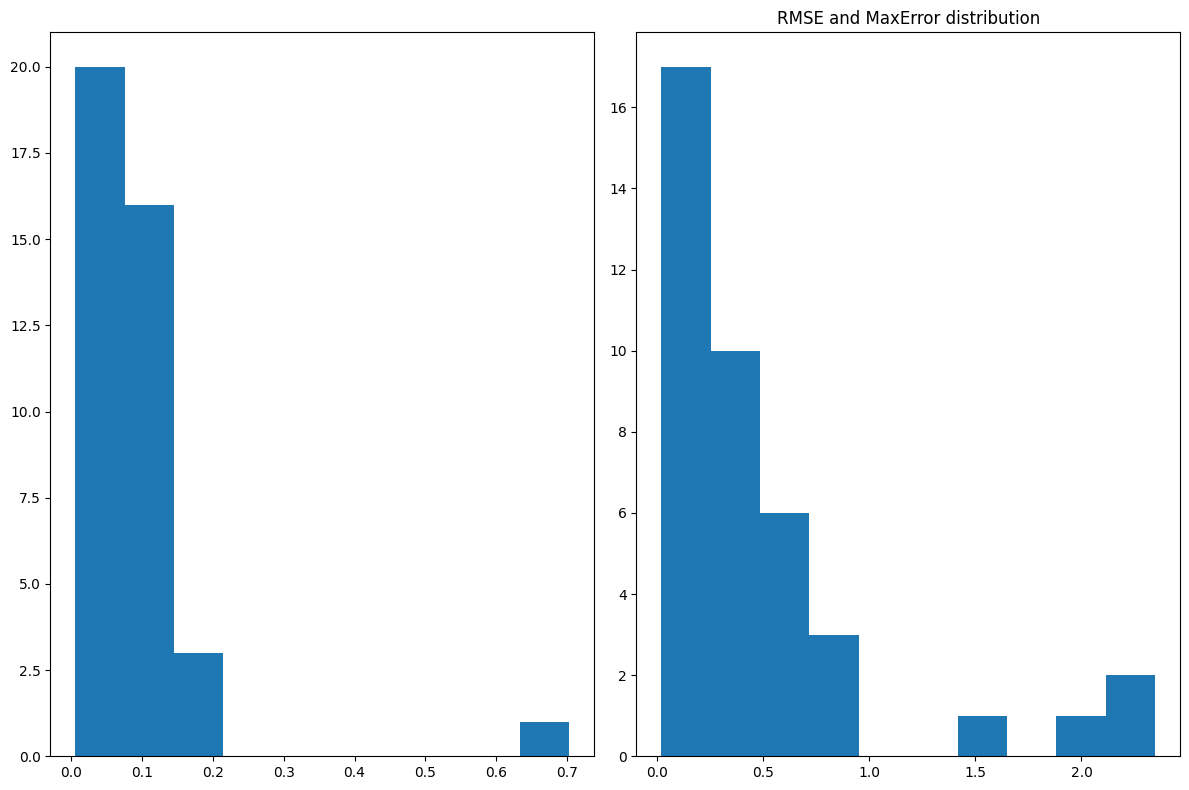

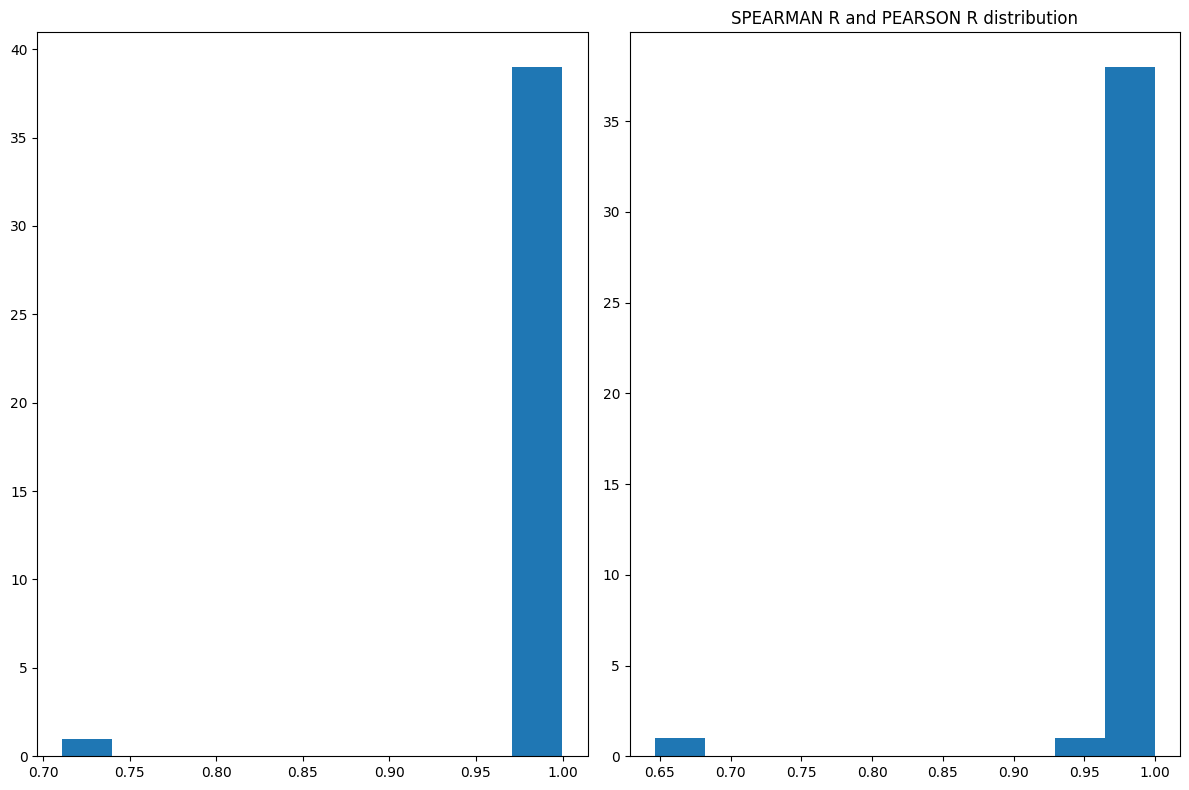


OBJECTID_VANO_2D: 7

ID_VANO: G_13499432_13645947

LONGITUD_2D: 70.24246667892939

COORDENADA_X_INICIO: 113580.91860000044

COORDENADA_Y_INICIO: 4668038.514599999

COORDENADA_X_FIN: 113618.43570000026

COORDEANDA_Y_FIN: 4667979.1305

APOYOS: 
- Length of list: 2
    OBJECTID_APOYO_3D: 53
    COD_APOYO: 13645947
    COORDENADA_X: 113580.91860000044
    COORDEANDA_Y: 4668038.514599999
    COORDENADAS_Z: [625.2428999999975, 637.1619000000064]
    - Length of list: 2

CONDUCTORES: 
- Length of list: 6
    OBJECTID_VANO_3D: 178
    LONGITUD_2D: 8.74250095626819
    LONGITUD_3D: 8.780648764774833
    VERTICES: [[113582.45349999983, 4668039.5271000005, 636.9471999999951], [113590.95490000024, 4668037.4881, 636.1296000000002]]
    - Length of list: 2

CONDUCTORES_CORREGIDOS: 

CONDUCTORES_CORREGIDOS_PARAMETROS_(a,h,k): 

PUNTUACIONES: 

flag: bad_cluster

line_number: 3

config: 0

completeness: ['full']


In [8]:
import copy

pathdata0 = "./data/lineas_completas/XIN803.json"

bad_ids0 = get_bad_ids(pathdata0.split("json")[0]+"txt")

with open(pathdata0, 'r') as archivo:
        data = json.load(archivo)

print(len(data), bad_ids0)

set_logger("INFO")

# Declare lists for metrics: rmse, correlations...
rmses = []
maxes = []
correlations = []

bad_cases = 0
good_cases = 0

# Define a dictionary to store the results of all fit evaluation to extract Puntuaciones
# evaluaciones = dict()

logger.error(f"\n NUMBER OF BAD IDS {len(bad_ids0)}")

# Loop over data
for i in range(len(data[:50])):
        
        logger.critical(f"\nProcessing Vano {i}")
        
        # vano = copy.copy(data[i])
        data[i], metrics = process_vano(data[i])
        
        if metrics != -1:
                
                rmses.append(metrics[0])
                maxes.append(metrics[1])
                correlations.append([metrics[2], metrics[3]])
                good_cases += 1
        else:
                logger.error("Bad clustering")
                bad_cases += 1
                
logger.info(f"\nMETRICS: ")
logger.success(f"Bad cases vs good cases: {bad_cases}, {good_cases}")
logger.success(f"Mean RMSE and mean RmaxSE: {np.array(rmses).mean().mean()}, {np.array(maxes).mean().mean()}")
logger.success(f"Mean correlation R Pearson and Spearman: {np.array(correlations)[:,0].mean().mean()}, {np.array(correlations)[:,1].mean().mean()}")

plt.figure(figsize=(12,8))

plt.subplot(121)
plt.hist(np.array(rmses).flatten())
plt.subplot(122)
plt.hist(np.array(maxes).flatten())

plt.title("RMSE and MaxError distribution")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))

plt.subplot(121)
plt.hist(np.array(correlations)[:,0].flatten())
plt.subplot(122)
plt.hist(np.array(correlations)[:,1].flatten())

plt.title("SPEARMAN R and PEARSON R distribution")
plt.tight_layout()
plt.show()

print_element(data[5])

In [9]:
data[1]["CONDUCTORES_CORREGIDOS"]

{'0': [[0.4656828842294437, 2.174448185807817, 3.4453630919882157],
  [0.47270098785353354, 2.157735038686817, 3.3619007321943637],
  [0.4797190914776228, 2.141021891565817, 3.2797520693791617],
  [0.4867371951017124, 2.1243087444448174, 3.198897395919361],
  [0.4937552987258019, 2.1075955973238174, 3.1193173146222626],
  [0.5007734023498915, 2.0908824502028174, 3.0409927340723],
  [0.5077915059739813, 2.0741693030818174, 2.963904864050959],
  [0.5148096095980706, 2.0574561559608173, 2.888035211028985],
  [0.5218277132221605, 2.0407430088398177, 2.8133655737297345],
  [0.52884581684625, 2.0240298617188177, 2.739878038762659],
  [0.5358639204703394, 2.0073167145978177, 2.6675549763258504],
  [0.5428820240944291, 1.9906035674768177, 2.5963790359766135],
  [0.5499001277185184, 1.973890420355818, 2.5263331424690603],
  [0.5569182313426082, 1.9571772732348178, 2.457400491657732],
  [0.5639363349666978, 1.940464126113818, 2.3895645464662505],
  [0.5709544385907873, 1.9237509789928182, 2.3228

In [10]:
summary = pd.DataFrame(columns=["ids", "flags", "line_numbers", "configs", "completenesses"])

for vano in data:
    
    try:
        row = pd.DataFrame({"ids" : vano["ID_VANO"], "flags" : vano["flag"], "line_numbers" : vano["line_number"], "configs" : vano["config"], "completenesses" : vano["completeness"]})
        
        summary = pd.concat([summary, row])
        
    except Exception as e:
        try:
            print(e)
            # print_element(vano)
        except Exception as ex:
            pass
    
summary

If using all scalar values, you must pass an index
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'
'flag'


,ids,flags,line_numbers,configs,completenesses
0,G_13645821_13645987,good_fit,3 confirmed,0,full
0,G_13645776_13645990,good_fit,3 confirmed,0,partially incomplete
0,G_13645684_13645777,good_fit,3 confirmed,0,full
0,G_13615863_13645824,bad_cluster,3,0,full
0,G_13645732_13645823,good_fit,3 confirmed,0,full
0,G_13499432_13645947,bad_cluster,3,0,full
0,G_13645686_13645952,good_fit,3 confirmed,0,full
0,G_13037116_13511437,bad_cluster,0,0,incomplete
0,G_13618881_13645690,good_fit,3 confirmed,0,full
0,G_13645790_13645962,bad_cluster,3,0,full


In [11]:
summary[summary["flags"] != "good_fit"]
# summary[summary["flags"] == "good_fit"].shape

,ids,flags,line_numbers,configs,completenesses
0,G_13615863_13645824,bad_cluster,3,0,full
0,G_13499432_13645947,bad_cluster,3,0,full
0,G_13037116_13511437,bad_cluster,0,0,incomplete
0,G_13645790_13645962,bad_cluster,3,0,full
0,G_13645765_13645809,bad_cluster,3,0,full
0,G_13645817_13645977,bad_cluster,3,0,full
0,G_13645910_13645956,bad_cluster,3,0,full
0,G_13645947_13645992,bad_cluster,3,0,full
0,G_13645821_13645862,bad_cluster,0,1,incomplete


In [12]:
new_bad = 0
old_bad = 0

for vano in data:
    try:
        
        if vano["flag"] != "None":
            print(vano["ID_VANO"], vano["flag"])
            if vano["ID_VANO"] in bad_ids0:
                old_bad += 1
            else:
                new_bad += 1
    except Exception as e:
        pass
print(f"Old bad vs new bad: {old_bad} {new_bad}")

G_13645821_13645987 good_fit
G_13645776_13645990 good_fit
G_13645684_13645777 good_fit
G_13615863_13645824 bad_cluster
G_13645732_13645823 good_fit
G_13499432_13645947 bad_cluster
G_13645686_13645952 good_fit
G_13037116_13511437 bad_cluster
G_13618881_13645690 good_fit
G_13645790_13645962 bad_cluster
G_13645744_13645920 good_fit
G_13645844_13645888 good_fit
G_13645647_13645791 good_fit
G_13645750_13645842 good_fit
G_13645707_13645750 good_fit
G_13645718_13645899 good_fit
G_13645765_13645809 bad_cluster
G_13645665_13645719 good_fit
G_13088932_13645854 good_fit
G_13145989_13645938 good_fit
G_13645721_13645813 good_fit
G_13645767_13645812 good_fit
G_13645817_13645977 bad_cluster
G_13645668_13645817 good_fit
G_13645771_13645980 good_fit
G_13645819_13645906 good_fit
G_13645819_13645981 good_fit
G_13645981_13645982 good_fit
G_13645776_13645989 good_fit
G_13645683_13645951 good_fit
G_13645681_13645867 good_fit
G_13645733_13645868 good_fit
G_13645738_13645781 good_fit
G_13645687_13645874 good_

In [13]:
# rmses = []
# maxes = []
# correlations = []

# for i in range(len(data[:])):
        
#         print(f"\nProcessing Vano {i}")
        
#         vano_id = data[i]['ID_VANO']
    
#         try:
            
#             idv, vano_length, cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)

#             apoyo_values, cond_values = down_sample_lidar(apoyo_values, cond_values)
            
#             _, extremos_values = analyze_backings(vano_length, apoyo_values, extremos_values, dataf=None)
            
#             if extremos_values == -1:
#                 continue
            
#             mat, rotated_conds, rotated_apoyos, rotated_vertices, rotated_extremos = rotate_vano(cond_values, extremos_values, apoyo_values, vert_values)
            
#             rotated_conds = clean_outliers(rotated_conds, rotated_extremos)
            
#             X_scaled,scaler_x,scaler_y,scaler_z = scale_conductor(rotated_conds)

#             a1,b1 = np.histogram(X_scaled[0,:]/np.max(X_scaled[0,:]))
#             a2,b2 = np.histogram(X_scaled[1,:]/np.max(X_scaled[1,:]))
            
#             normalized_a1 = a1/np.max(a1)
#             normalized_a2 = a2/np.max(a2)
            
#             cond1 = np.abs(np.max(normalized_a1)-np.min(normalized_a1)) > np.abs(np.max(normalized_a2)-np.min(normalized_a2))
#             # cond2 = np.std(normalized_a1) > np.std(normalized_a2)
            
#             if cond1:
                
#                 print("distribución horizontal")
#                 good_clust = False
                
#                 for i in range(3):
                
#                     # print(X_scaled.shape)
                    
#                     # n_clusters = 3  # Número de clusters esperado (ajustar según tus necesidades)
#                     # spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=10, n_neighbors=50)
#                     # labels = spectral_clustering.fit_predict(X_scaled.T)
                    
#                     # for lab in set(labels):
#                     #     centroids = X_scaled[:,labels == lab]
                    

#                     labels, centroids = kmeans_clustering(X_scaled, 3, 500)
                    
#                     min_cent = np.min(centroids)
#                     max_cent = np.max(centroids)
                    
#                     mid_cent = centroids[(centroids != min_cent)*(centroids != max_cent)]

#                     cent_dist1 = abs(mid_cent - max_cent)
#                     cent_dist2 = abs(mid_cent - min_cent)
                    
#                     diff = abs(cent_dist1-cent_dist2)[0]
                    
#                     print(diff/abs(max_cent-min_cent))
                    
#                     if (diff/abs(max_cent-min_cent) < 0.1):
                        
#                         print("GOOD CENTROIDS")
                        
#                         clusters = []
#                         min_max = []
                        
#                         for lab in np.unique(labels):
                            
#                             clusters.append(X_scaled[:, labels == lab])
#                             min_max.append((np.min(X_scaled[0, labels == lab]),np.max(X_scaled[0, labels == lab])))
                        
#                         # Check for overlapping clusters
#                         overlapping_clusters = []
#                         for k, (min_x_k, max_x_k) in enumerate(min_max):
#                             for j, (min_x_j, max_x_j) in enumerate(min_max):
                                
#                                 if k != j:
                                    
#                                     dist1 = abs(min_x_k - max_x_j)
#                                     dist2 = abs(min_x_j - max_x_k)
                                    
#                                     # print(dist1/abs(max_cent-min_cent), dist2/abs(max_cent-min_cent))
                                    
#                                     if (dist1/abs(max_cent-min_cent) < 0.05 or dist2/abs(max_cent-min_cent) < 0.05):
#                                         overlapping_clusters.append(k)
#                                     # print((min_x_k, max_x_k), (min_x_j, max_x_j))
                        
#                         if len(overlapping_clusters) == 0:
#                             print("GOOD CLUSTERS: found 3")
#                             good_clust = True
#                             break
                        
#                         else:
#                             print("OVERLAPPING CLUSTERS")
#                             good_clust = False
#                             break
                            
#                     else:
#                         print(f"TRY {i}")
#                         continue
            
#                 if not good_clust:
                    
#                     print("BAD CLUSTERS AFTER 3 TRIALS")
#                     # plot_clusters(X_scaled, labels, centroids)
                
#                 else:
                    
#                     # def catenaria(x, a, h, k):
#                     #     return a*np.cosh((x-h)/a)+k
#                     # p0 = [1, 0, 0]  # a, h, k
                    
#                     def catenaria(x, a, b, c, d):
#                             return a + b*x + c*x**2 + d*x**3
#                     p0 = [0, 1, 1, 1]
                    
                    
#                     # plt.figure(figsize=(12,8))
                    
#                     for l,clus in enumerate(clusters):
                        
#                         clus = clean_outliers_2(clus)
                        
#                         y_pol, z_pol, parametros, metrics = fit_3D_coordinates(clus[1,:], clus[2,:], catenaria, p0)
                        
#                         rmses.append(metrics[0])
#                         maxes.append(metrics[1])
#                         correlations.append([metrics[2], metrics[3]])
                        
#                     #     plt.subplot(1,3,l+1)
#                     #     plt.scatter(clus[1,:], clus[2,:])
#                     #     plt.scatter(y_pol, z_pol)
                    
#                     # plt.show()
                
#             # elif np.abs(np.max(normalized_a2)-np.min(normalized_a2)) > 0.8 and cond2:
#             #     print("distribución horizontal")
                    
#             else:
#                 print("Other geometry")
                    
#                 a1,b1 = np.histogram(X_scaled[1,:]/np.max(X_scaled[1,:]))
#                 a2,b2 = np.histogram(X_scaled[2,:]/np.max(X_scaled[2,:]))
                
#                 normalized_a1 = a1/np.max(a1)
#                 normalized_a2 = a2/np.max(a2)
                
#                 cond1 = np.abs(np.max(normalized_a1)-np.min(normalized_a1)) > np.abs(np.max(normalized_a2)-np.min(normalized_a2))
                
#                 print("vertical distribution")
                
#             # plot_2d(rotated_conds, rotated_extremos, rotated_apoyos)
#             # plt.show()
                    
#             # plt.figure(figsize=(12,8))
#             # plt.subplot(121)
#             # plt.hist(X_scaled[0,:])
#             # plt.subplot(122)
#             # plt.hist(X_scaled[1,:])
#             # plt.show()
                
#             # print(np.std(X_scaled[0,:]/np.max(X_scaled[0,:])), np.std(X_scaled[1,:]/np.max(X_scaled[1,:])))
#             # print(np.abs(np.max(X_scaled[0,:])-np.min(X_scaled[0,:])), np.abs(np.max(X_scaled[1,:])-np.min(X_scaled[1,:])))
#             # print(np.abs(np.max(normalized_a1)-np.min(normalized_a1)), np.abs(np.max(normalized_a2)-np.min(normalized_a2)))
#             # print(np.std(normalized_a1), np.std(normalized_a2))
                    
            
            
#         except Exception as e:
#             raise ValueError("a")
#             print(f"Vano {vano_id} failed preprocess: {e}")
            
            
# print(f"\nMean RMSE and mean RmaxSE: {np.array(rmses).mean().mean()}, {np.array(maxes).mean().mean()}")
# print(f"Mean correlation R Pearson and Spearman: {np.array(correlations)[:,0].mean().mean()}, {np.array(correlations)[:,1].mean().mean()}")

# plt.figure(figsize=(12,8))

# plt.subplot(121)
# plt.hist(np.array(rmses).flatten())
# plt.subplot(122)
# plt.hist(np.array(maxes).flatten())

# plt.title("RMSE and MaxError distribution")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(12,8))

# plt.subplot(121)
# plt.hist(np.array(correlations)[:,0].flatten())
# plt.subplot(122)
# plt.hist(np.array(correlations)[:,1].flatten())

# plt.title("SPEARMAN R and PEARSON R distribution")
# plt.tight_layout()
# plt.show()

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks

# # Simular datos de ejemplo para la coordenada x basada en la gráfica proporcionada
# np.random.seed(0)
# x = np.concatenate([np.random.normal(loc=-1, scale=0.3, size=3000),
#                     np.random.normal(loc=0, scale=0.3, size=3000),
#                     np.random.normal(loc=1, scale=0.3, size=3000)])

# # Crear histograma
# bins = np.linspace(-2, 2, 20)
# hist_x, bin_edges_x = np.histogram(x, bins=bins)

# # Ajustar valores de prominence y threshold para encontrar los picos
# prominence_value = 300
# threshold_value = 100

# # Encontrar picos
# peaks_x, properties_x = find_peaks(hist_x, prominence=prominence_value, threshold=threshold_value)

# # Graficar histograma y picos
# plt.figure(figsize=(10, 6))
# plt.hist(x, bins=bins, alpha=0.5, label='x')
# plt.plot(bin_edges_x[peaks_x], hist_x[peaks_x], "x", label='Peaks x', markersize=10)
# plt.title('Coordinate x distribution with peaks')
# plt.legend()
# plt.show()

# # Imprimir posiciones de picos y sus propiedades
# print("Peaks in x-coordinates:", bin_edges_x[peaks_x])
# print("Peak properties:", properties_x)
